In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ml_coursera.regression import LinearRegression
from ml_coursera.preprocessing import normalize_features, feature_mapping
from ml_coursera.utils import plot_data, plot_regression_line

### Problem #1

In [2]:
df = pd.read_csv("ex1data1.txt", header=None)
df.columns = ["population", "profit"]
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
reg = LinearRegression(reg_param=1)
scaler = StandardScaler()

In [4]:
df[["population"]] = scaler.fit_transform(df[["population"]])

x = df[["population"]].to_numpy()
y = df[['profit']].to_numpy()

In [5]:
x.shape

(97, 1)

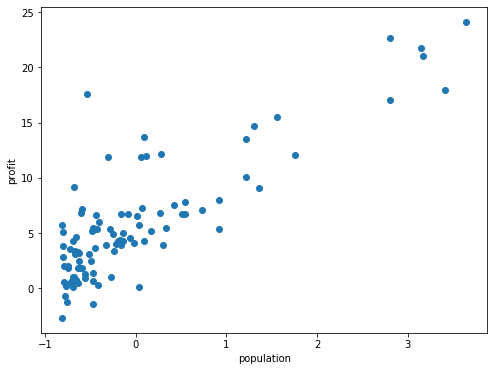

In [6]:
plot_data(x, y, feature_names=['population', 'profit'])

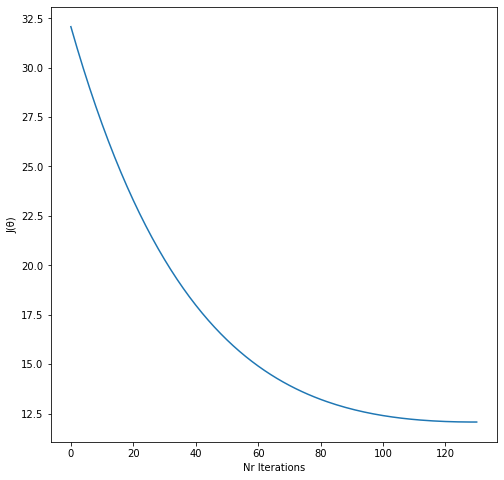

In [7]:
reg.fit(x, y)

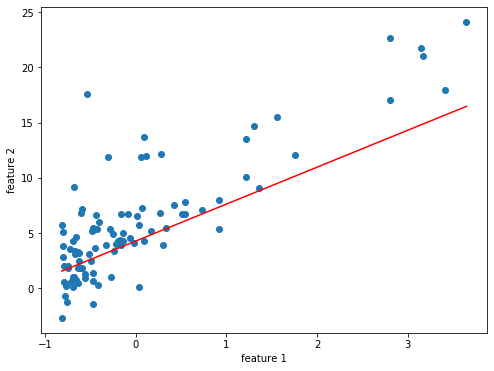

In [8]:
plot_regression_line(reg.coefficients, x, y)

In [9]:
reg.score(x, y)

0.5686008701101948

### Problem #2

In [10]:
df = pd.read_csv("ex1data2.txt", header=None)
df.columns = ["area", "bedroom", "price"]
df.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
reg = LinearRegression()
scaler = StandardScaler()

In [12]:
df[["area", "bedroom"]] = scaler.fit_transform(df[["area", "bedroom"]])

x = df[["area", "bedroom"]].to_numpy()
y = df[['price']].to_numpy()

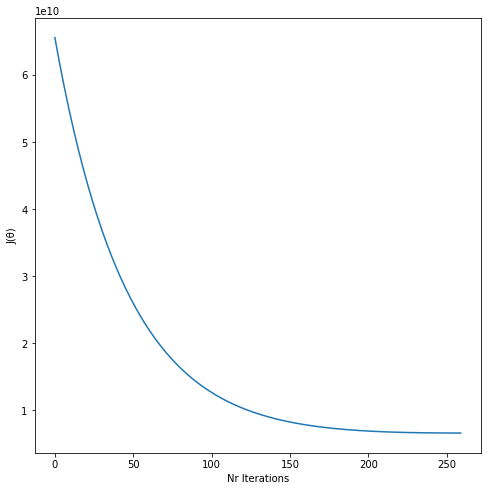

In [13]:
reg.fit(x, y)

In [14]:
if x.shape[1] == 1:
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(data=df, x="area", y="price")
    x_lin = np.linspace(df.area.min(), df.area.max(), 100)
    y_lin = reg.predict(np.reshape(x_lin, (-1, 1)))

    plt.plot(x_lin, y_lin, color="r")

    plt.show()

In [15]:
reg.score(x, y)

0.6725590376662163

In [16]:
reg.learning_curve?

In [20]:
X_train, y_train, X_test, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
y_train.shape

(10, 2)

In [21]:
reg.learning_curve(X_train, y_train, X_test, y_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()